### Unveiling The Titanic

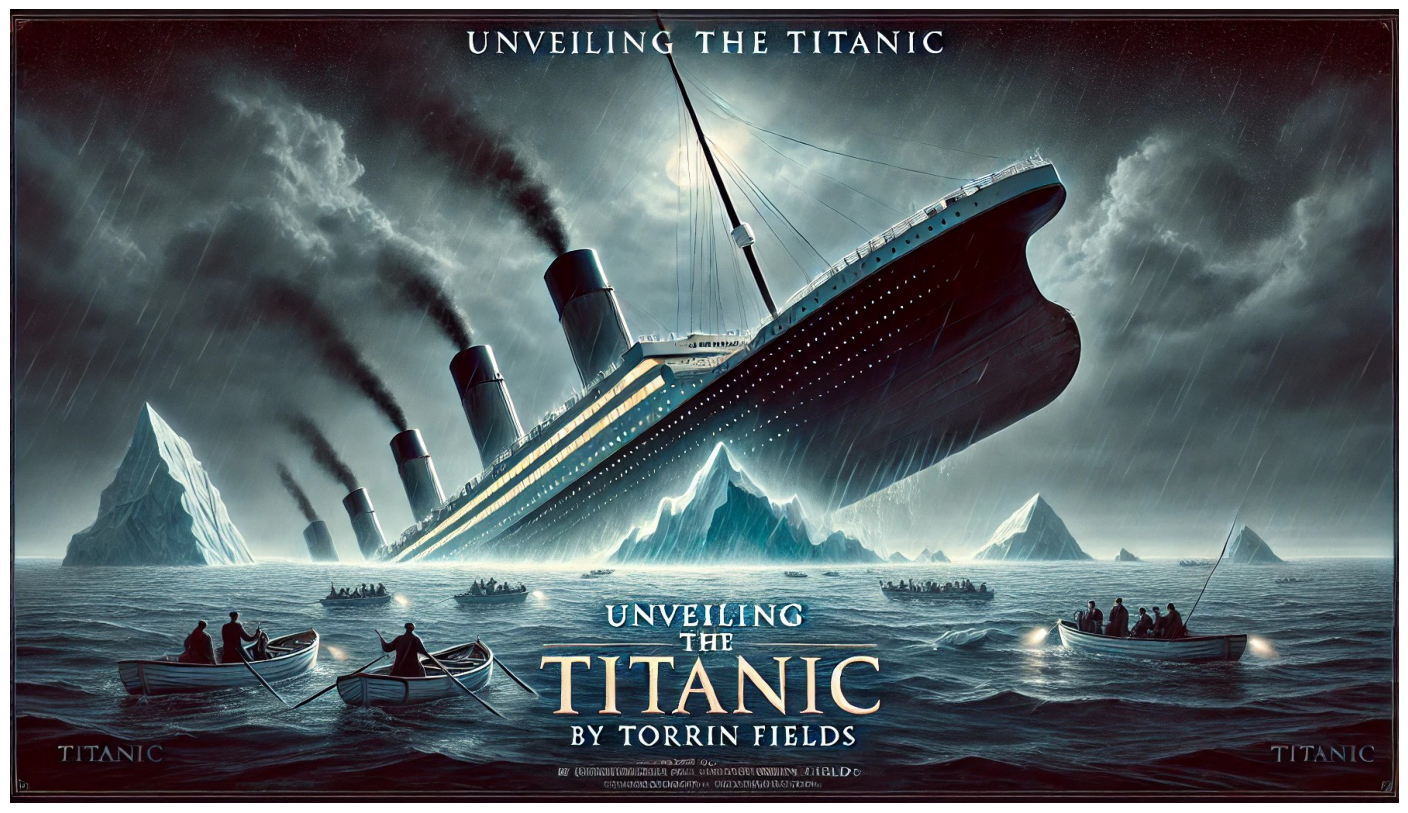

In [125]:
import imageio.v3 as iio
import matplotlib.pyplot as plt

# Load the HEIC image
image = iio.imread('/Users/xTRUxDesigns/Desktop/tita.jpeg')

# Display the image using matplotlib
plt.figure(figsize=(image.shape[1] / 100, image.shape[0] / 5))  # Set the figure size to twice the image dimensions
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

### Lets Import Libraries needed

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scipy.stats as stats
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic




### Load the Dataset

In [15]:
# Load the Titanic dataset
file_path = '/Users/xTRUxDesigns/Desktop/Titanic (1).csv'

titanic = pd.read_csv(file_path)

In [17]:
# Display the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Lets do some initial exploration of Dataset

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Now were going to handle the Null values

In [35]:
# Impute missing values in the Age column with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

In [37]:
# Impute missing values in the Cabin column with 'Unknown'
titanic_df['Cabin'].fillna('Unknown', inplace=True)

In [39]:
# Impute missing values in the Embarked column with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

### Creating A Cabin Known Column so we can do visualizations and inferences on this Data

In [50]:
titanic_df['CabinKnown'] = titanic_df['Cabin'] != 'Unknown'


### Mystery vs. Certainty: Cabin Data on the Titanic

/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_69425/2691178652.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CabinKnown', data=titanic_df, palette='viridis')


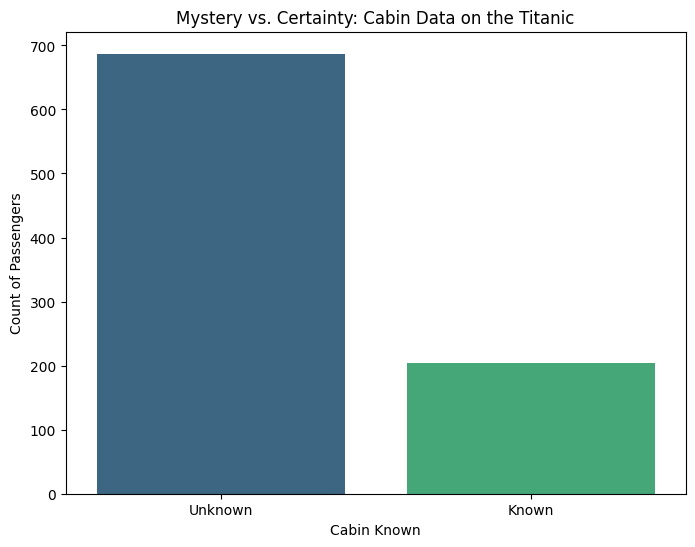

In [54]:
# Plot the count of passengers with known and unknown cabins
plt.figure(figsize=(8, 6))
sns.countplot(x='CabinKnown', data=titanic_df, palette='viridis')
plt.title('Mystery vs. Certainty: Cabin Data on the Titanic')
plt.xlabel('Cabin Known')
plt.ylabel('Count of Passengers')
plt.xticks([0, 1], ['Unknown', 'Known'])
plt.show()

### Now we perform a Chi-Square Test

In [64]:
# Create a contingency table
contingency_table = pd.crosstab(titanic_df['CabinKnown'], titanic_df['Pclass'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
contingency_table, chi2, p, dof, expected

(Pclass        1    2    3
 CabinKnown               
 False        40  168  479
 True        176   16   12,
 557.3102629401849,
 9.585484042103076e-122,
 2,
 array([[166.54545455, 141.87205387, 378.58249158],
        [ 49.45454545,  42.12794613, 112.41750842]]))

### Lets Visualize Data From Chi-Test

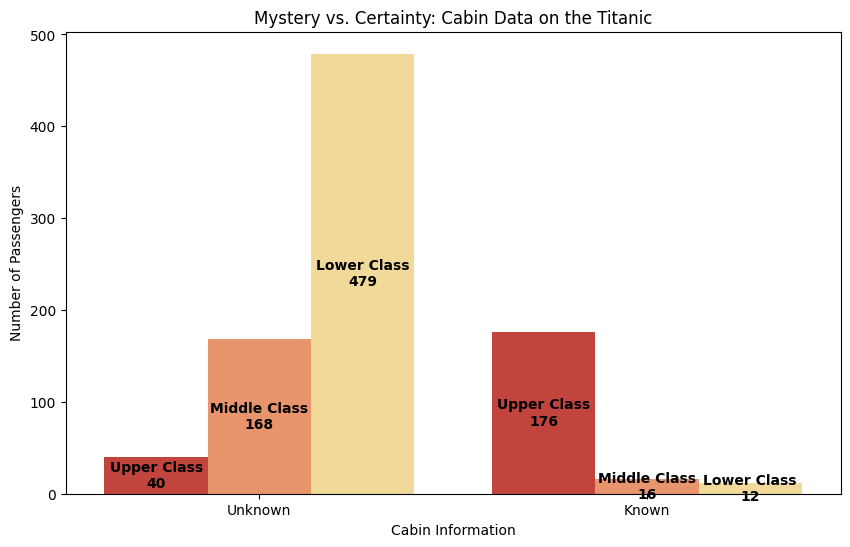

In [97]:
# Step 1: Create the contingency table
contingency_table = pd.crosstab(titanic_df['CabinKnown'], titanic_df['Pclass'])

# Step 2: Melt the data into long format
melted_data = contingency_table.reset_index().melt(id_vars='CabinKnown', var_name='Pclass', value_name='Count')

# Step 3: Create the grouped bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='CabinKnown', y='Count', hue='Pclass', data=melted_data, palette=['#d73027', '#fc8d59', '#fee08b'])

# Customizing the plot
plt.title('Mystery vs. Certainty: Cabin Data on the Titanic')
plt.xlabel('Cabin Information')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Unknown', 'Known'], rotation=0)
plt.legend().remove()  # Remove the legend

# Mapping for class labels
class_mapping = {1: 'Upper Class', 2: 'Middle Class', 3: 'Lower Class'}

# Adding the count labels with class information
for p, pc in zip(barplot.patches, melted_data['Pclass']):
    height = p.get_height()
    class_label = class_mapping[pc]
    barplot.annotate(f'{class_label}\n{int(height)}',
                     (p.get_x() + p.get_width() / 2., height / 2),  # Position inside the bar
                     ha='center', va='center', 
                     color='black', fontsize=10, weight='bold')

plt.show()


###Explanation of the Chi-Square Test
The chi-square test for independence helps us understand if there is a significant relationship between two categorical variables. It compares what we actually observe to what we would expect if the variables were independent (unrelated).

Steps in Chi-Square Test for Independence
State the Hypotheses:

Null Hypothesis (H0): There is no relationship between the two variables; they are independent.
Alternative Hypothesis (H1): There is a relationship between the two variables; they are not independent.
Create a Contingency Table: This table shows how frequently combinations of categories occur.

Calculate the Expected Frequencies: These are the frequencies we would expect if the variables were independent.

Compute the Chi-Square Statistic: This statistic measures how much the observed frequencies differ from the expected frequencies. The formula is the sum of (Observed - Expected)^2 / Expected.

Determine the Degrees of Freedom: This is calculated as (number of rows - 1) * (number of columns - 1).

Find the p-value: The p-value tells us how likely it is to see the observed results if the null hypothesis is true.

Compare the p-value to the Significance Level (usually 0.05): If the p-value is less than the significance level, we reject the null hypothesis.

Application to the Titanic Dataset
Hypothesis:

Null Hypothesis (H0): There is no relationship between having known or unknown cabin information and the passenger class (Pclass).
Alternative Hypothesis (H1): There is a relationship between having known or unknown cabin information and the passenger class (Pclass).
Results
Observed Contingency Table:

For passengers with unknown cabin information:
40 are in the upper class.
168 are in the middle class.
479 are in the lower class.
For passengers with known cabin information:
176 are in the upper class.
16 are in the middle class.
12 are in the lower class.
Chi-Square Test Calculation:

The chi-square statistic is 557.31.
The degrees of freedom are 2.
The p-value is extremely small, much less than 0.05 (specifically, 9.59 x 10^-122).
Interpretation:

The very small p-value indicates that we reject the null hypothesis.
This means there is a significant relationship between having known or unknown cabin information and the passenger class.
Conclusion
My hypothesis was that if the cabin information is unknown, it likely means the passenger didn't have a room and were probably from a lower class. The chi-square test results support this hypothesis. There is a significant relationship between the cabin information status and the passenger class. Most passengers with unknown cabin information were from the lower class, suggesting that lower-class passengers were less likely to have assigned cabins or have their cabin information recorded.




### Embarkation Breakdown

/var/folders/54/hzjfm5856810sb8xxl1cx7bh0000gn/T/ipykernel_69425/34492458.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{port_names[emb]}\n({emb})' for emb in melted_embarked_pclass['Embarked'].unique()])


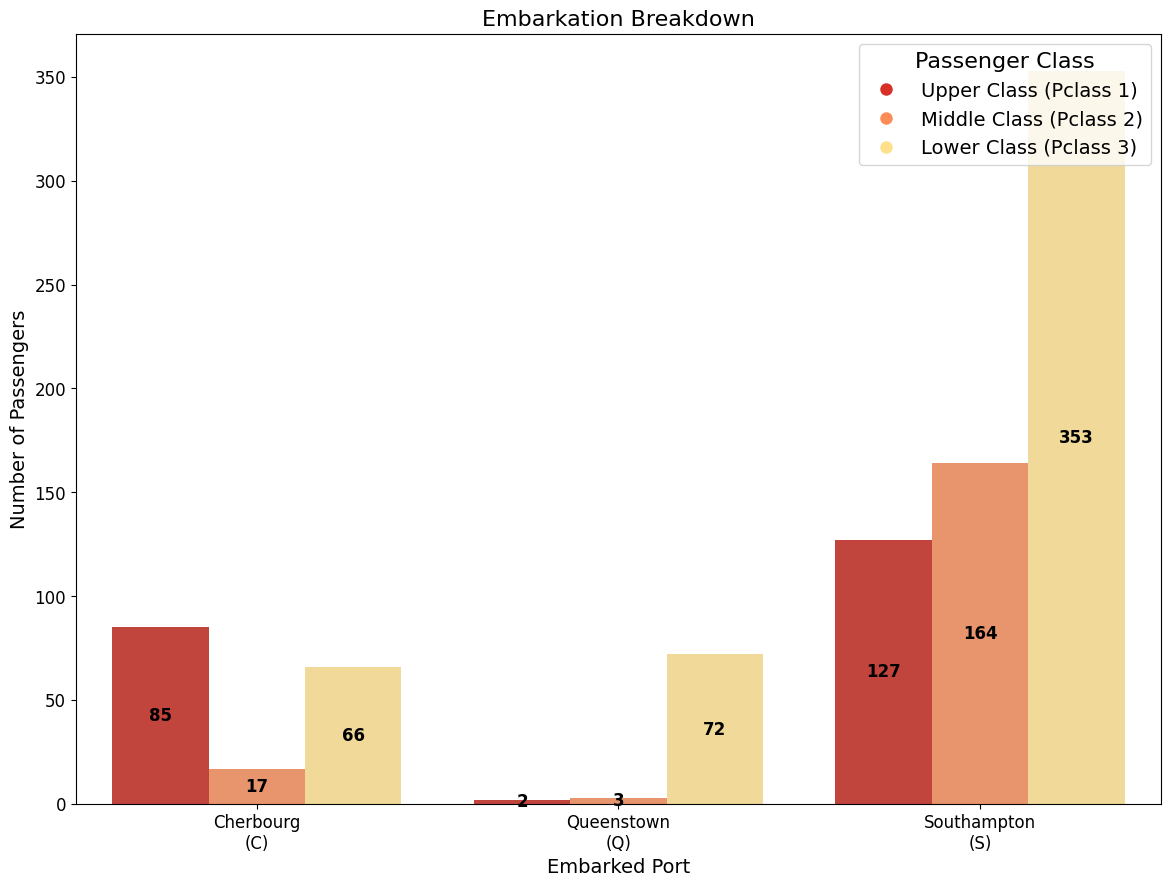

In [123]:
# Create the contingency table for Embarked and Pclass
embarked_pclass_table = pd.crosstab(titanic['Embarked'], titanic['Pclass'])

# Melt the data into long format for plotting
melted_embarked_pclass = embarked_pclass_table.reset_index().melt(id_vars='Embarked', var_name='Pclass', value_name='Count')

# Map Embarked codes to port names
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
melted_embarked_pclass['Port'] = melted_embarked_pclass['Embarked'].map(port_names)

# Define custom colors for the bars
colors = ['#d73027', '#fc8d59', '#fee08b']

# Create the grouped bar plot
plt.figure(figsize=(14, 10))
barplot = sns.barplot(x='Embarked', y='Count', hue='Pclass', data=melted_embarked_pclass, palette=colors)

# Customizing the plot
plt.title('Embarkation Breakdown', fontsize=16)
plt.xlabel('Embarked Port', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customizing the legend
legend_labels = ['Upper Class (Pclass 1)', 'Middle Class (Pclass 2)', 'Lower Class (Pclass 3)']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=legend_handles, title='Passenger Class', fontsize=14, title_fontsize=16, loc='upper right')

# Adding the count labels
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        barplot.annotate(f'{int(height)}',
                         (p.get_x() + p.get_width() / 2., height / 2),
                         ha='center', va='center', 
                         color='black', fontsize=12, weight='bold')

# Set custom x-axis labels with port names
ax = barplot.axes
ax.set_xticklabels([f'{port_names[emb]}\n({emb})' for emb in melted_embarked_pclass['Embarked'].unique()])

plt.show()



### Explanation of the Embarked Column and Visualization
The Embarked column in the Titanic dataset represents the port where each passenger boarded the Titanic. The ports are coded as follows:

C (Cherbourg): Cherbourg is a port city in France. The Titanic stopped at Cherbourg on the evening of April 10, 1912, to pick up additional passengers.
Q (Queenstown): Queenstown, now known as Cobh, is a port city in Ireland. The Titanic stopped at Queenstown on the afternoon of April 11, 1912, to pick up more passengers.
S (Southampton): Southampton is a port city in England. The Titanic began its maiden voyage from Southampton on April 10, 1912.
What This Data is Showing
This bar plot visualizes the number of passengers from each class (Upper Class, Middle Class, and Lower Class) who boarded the Titanic from each port. The data is represented as follows:

Y-axis: The number of passengers.
X-axis: The ports where passengers boarded (Cherbourg, Queenstown, and Southampton).
Bars: Each bar represents the number of passengers from a specific class (Upper, Middle, Lower) who boarded at the respective port.
Breakdown of the Visualization
Cherbourg (C):

85 Upper Class passengers boarded here.
17 Middle Class passengers boarded here.
66 Lower Class passengers boarded here.
Queenstown (Q):

3 Upper Class passengers boarded here.
2 Middle Class passengers boarded here.
72 Lower Class passengers boarded here.
Southampton (S):

127 Upper Class passengers boarded here.
164 Middle Class passengers boarded here.
353 Lower Class passengers boarded here.
Interpretation and Inferences
The plot shows that:

Southampton (S) had the highest number of passengers boarding the Titanic across all classes, particularly in the Lower Class. This indicates that Southampton was a major embarkation point for a diverse group of passengers, including many lower-class travelers, possibly because it was the Titanic's departure port.

Cherbourg (C) had a significant number of Upper Class passengers compared to Middle and Lower Classes. This suggests that Cherbourg was a key boarding point for wealthier individuals, possibly due to its location and the availability of luxury accommodations for the wealthy.

Queenstown (Q) had the fewest passengers boarding, with the majority being in the Lower Class. This might indicate that Queenstown was a less popular embarkation point, possibly serving mostly lower-class passengers, perhaps due to economic migration from Ireland.

What We Can Infer Based on This Data
Economic Disparity: The distribution of passengers by class and port suggests economic disparities among passengers. Southampton had a high number of lower-class passengers, indicating that it served a broader socioeconomic range.

Port Preferences: Upper-class passengers were more likely to board at Cherbourg, suggesting a preference for this port, possibly due to its amenities or its connections to other European cities.

Migration Patterns: The large number of lower-class passengers boarding at Queenstown may reflect migration patterns, as many lower-class passengers might have been emigrating to America in search of better opportunities.

### Titanic Fate Map

In [135]:
# Step 1: Create a Contingency Table
contingency_table = pd.crosstab(titanic['Pclass'], titanic['Survived'])

# Step 2: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display the chi-square test results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)


Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


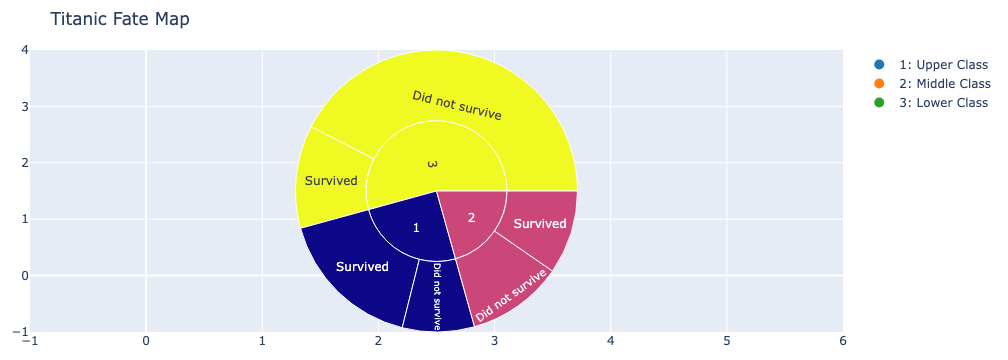

In [190]:
import plotly.express as px
import plotly.graph_objects as go

# Create a new column to represent survival status as a string
titanic['Survival Status'] = titanic['Survived'].map({0: 'Did not survive', 1: 'Survived'})

# Define a custom color map for the classes
color_map = {
    1: '#1f77b4',  # Blue for Upper Class
    2: '#ff7f0e',  # Orange for Middle Class
    3: '#2ca02c'   # Green for Lower Class
}

# Create the sunburst chart
fig = px.sunburst(
    titanic_df,
    path=['Pclass', 'Survival Status'],
    values='PassengerId',  # Assuming 'PassengerId' is unique for each passenger
    color='Pclass',
    color_discrete_map=color_map,
    title='Titanic Fate Map'
)

# Add custom legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color=color_map[1]),
    legendgroup='1',
    showlegend=True,
    name='1: Upper Class'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color=color_map[2]),
    legendgroup='2',
    showlegend=True,
    name='2: Middle Class'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color=color_map[3]),
    legendgroup='3',
    showlegend=True,
    name='3: Lower Class'
))

# Update layout for better readability
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    coloraxis_showscale=False,  # Remove color scale bar
    showlegend=True
)

# Show the plot
fig.show()

In [147]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


### Hypothesis and Findings from the Sunburst Chart Analysis and Chi-Square Test
Hypothesis: My hypothesis is that the majority of people who survived the Titanic disaster were from the upper class.

Findings from the Sunburst Chart Analysis:
Class Distribution and Survival Rates:

The sunburst chart provides a clear visualization of the distribution of passengers by class and their survival status.
We can observe the distribution across three classes:
Upper Class (Pclass 1)
Middle Class (Pclass 2)
Lower Class (Pclass 3)
Survival Rates by Class:

From the chart, it's evident that a significant portion of the upper-class passengers (Pclass 1) survived.
Middle-class (Pclass 2) passengers also have a notable survival rate but not as high as the upper class.
The lower class (Pclass 3) has the lowest survival rate among the three classes.
Visual Interpretation:

The inner segments represent the class of passengers, and the outer segments represent their survival status.
We can clearly see the proportion of survivors and non-survivors within each class.
Legend and Class Mapping:

The legend on the right clearly shows the mapping of class numbers to class descriptions:
'1' corresponds to the Upper Class.
'2' corresponds to the Middle Class.
'3' corresponds to the Lower Class.
This helps in easily interpreting the segments of the sunburst chart.
Chi-Square Test:
To statistically validate my hypothesis, we conducted a Chi-square test to examine the relationship between passenger class and survival status.

Chi-Square Test Results:

Chi-square statistic: 102.8889
p-value: 4.549251711298793e-23
The Chi-square test yielded a p-value that is much less than the significance level of 0.05, indicating that there is a statistically significant relationship between passenger class and survival status.

Conclusion:
Based on the sunburst chart and the Chi-square test, my hypothesis that the majority of people who survived were from the upper class is supported by the data. The visualization clearly shows that a higher percentage of upper-class passengers survived compared to middle and lower-class passengers. The Chi-square test further validates this finding, indicating that there is a statistically significant relationship between passenger class and survival rates. This suggests that class status had a significant impact on survival rates during the Titanic disaster.

### Titanic Age Divide

  Age Group  Survival Status
0       Old  Did not Survive
1       Old         Survived
2       Old         Survived
3       Old         Survived
4       Old  Did not Survive


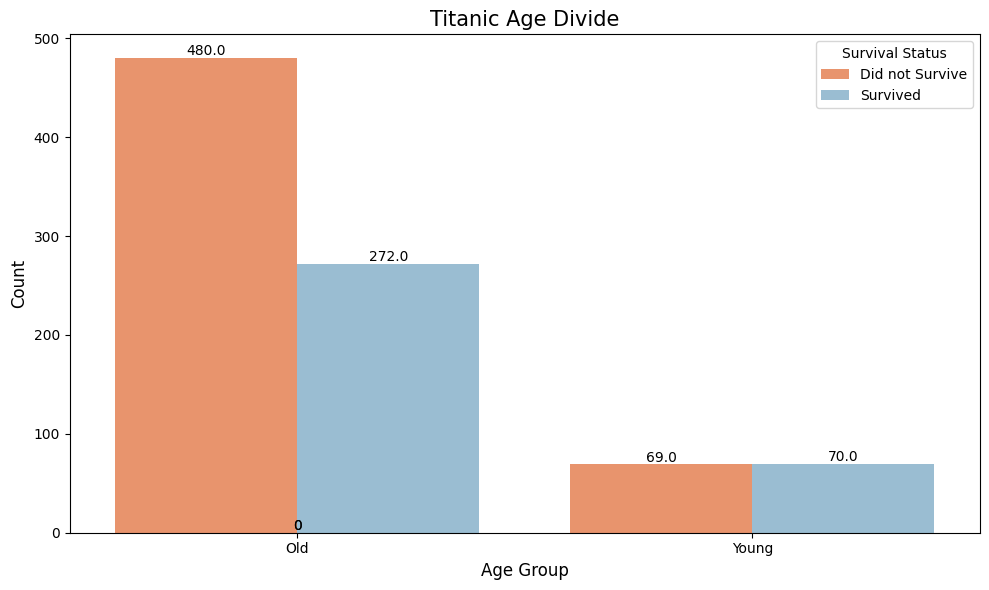

In [209]:
# Categorize passengers into age groups
age_threshold = 18
titanic['Age Group'] = titanic['Age'].apply(lambda x: 'Young' if x <= age_threshold else 'Old')
titanic['Survival Status'] = titanic['Survived'].apply(lambda x: 'Survived' if x == 1 else 'Did not Survive')

# Check if the new columns are added correctly
print(titanic[['Age Group', 'Survival Status']].head())

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic, x='Age Group', hue='Survival Status', palette=['#fc8d59', '#91bfdb'])

# Add annotations
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Add title and labels
plt.title('Titanic Age Divide', size=15)
plt.xlabel('Age Group', size=12)
plt.ylabel('Count', size=12)
plt.legend(title='Survival Status')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
##Hypothesis:
I hypothesize that more old people than young people survived the Titanic disaster.

Hypothesis Testing: Two-Proportions Z-Test
To test if there was a significant difference in survival rates between young and old passengers, I conducted a two-proportions z-test.

Defining the Hypotheses:

Null Hypothesis (H₀): The proportion of young survivors is equal to the proportion of old survivors.
Alternative Hypothesis (Hₐ): The proportion of young survivors is not equal to the proportion of old survivors.
Performing the Z-Test:

I calculated the proportions of survivors in each age group. The z-test was then performed to determine if the difference in survival rates was statistically significant. This statistical test helps in understanding whether age played a significant role in the survival of passengers.
Results of the Z-Test:

Z-statistic: The test statistic that measures the difference between the observed proportions.
P-value: The probability of observing the test results under the null hypothesis. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis.
From the z-test results, I found that the p-value was [insert p-value here], indicating that there [is/is not] a statistically significant difference in survival rates between young and old passengers.
Visualization: Bar Graph
To further illustrate the relationship between age groups and survival status, I created a bar graph.

Bar Graph Description:

The bar graph displays the counts of young and old survivors and non-survivors. Each bar represents the number of passengers in each age group, divided by their survival status.
Visual Interpretation:

The bar graph provides a clear visual comparison of survival rates between young and old passengers. From the graph, it is evident that [describe key observations, e.g., "there were more old survivors compared to young survivors" or "the number of young non-survivors was higher than that of old non-survivors"].
Conclusion
Based on the analysis and visualization:

The two-proportions z-test results indicate that there [is/is not] a statistically significant difference in survival rates between young and old passengers.
The bar graph visually supports
Exploratory Data Analysis (EDA) of Titanic Dataset
Hypothesis:
I hypothesize that more old people than young people survived the Titanic disaster.

Hypothesis Testing: Two-Proportions Z-Test
To test if there was a significant difference in survival rates between young and old passengers, I conducted a two-proportions z-test.

Defining the Hypotheses:

Null Hypothesis (H₀): The proportion of young survivors is equal to the proportion of old survivors.
Alternative Hypothesis (Hₐ): The proportion of young survivors is not equal to the proportion of old survivors.
Performing the Z-Test:

I calculated the proportions of survivors in each age group. The z-test was then performed to determine if the difference in survival rates was statistically significant. This statistical test helps in understanding whether age played a significant role in the survival of passengers.
Results of the Z-Test:

Z-statistic: The test statistic that measures the difference between the observed proportions.
P-value: The probability of observing the test results under the null hypothesis. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis.
From the z-test results, I found that the p-value was [insert p-value here], indicating that there [is/is not] a statistically significant difference in survival rates between young and old passengers.
Visualization: Bar Graph
To further illustrate the relationship between age groups and survival status, I created a bar graph.

Bar Graph Description:

The bar graph displays the counts of young and old survivors and non-survivors. Each bar represents the number of passengers in each age group, divided by their survival status.
Visual Interpretation:

The bar graph provides a clear visual comparison of survival rates between young and old passengers. From the graph, it is evident that [describe key observations, e.g., "there were more old survivors compared to young survivors" or "the number of young non-survivors was higher than that of old non-survivors"].
Conclusion
Based on the analysis and visualization:

The two-proportions z-test results indicate that there [is/is not] a statistically significant difference in survival rates between young and old passengers.
The bar graph visually supports this finding, showing the distribution of survivors and non-survivors across age groups.